# Code alongs - CNN

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)


Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [7]:
(x_train, y_train), (x_test, y_test)=load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [8]:
x_train.shape #detta är en tensor, en fyrdimensionell modell. vi har 50000 bilder, 32 x 32 with 3 columns

(50000, 32, 32, 3)

In [9]:
y_train #en array av en array, detta är en matris


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train, y_test = y_train.ravel(), y_test.ravel()  #.ravel() tar bort en dimension och gör så att vi bara har en kvar

In [14]:
y_train.shape

(50000,)

In [30]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

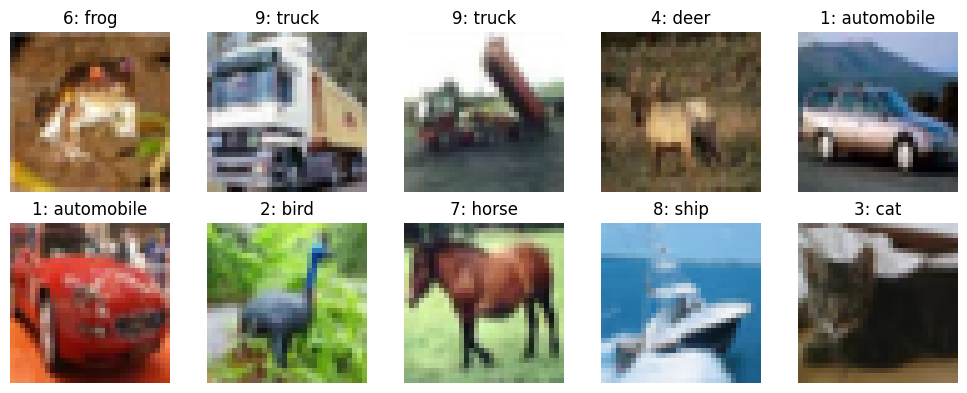

In [31]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")

fig.tight_layout()

In [21]:
x_train[1].shape

(32, 32, 3)

In [22]:
x_train[1].flatten().min, x_train[1].flatten().max()

(<function ndarray.min>, 254)

In [29]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

# CNN model


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model(learning_rate = 0.001, dropout_rate = .5, kernels =[32, 64]): #kernels är storleken på antalet filter
    # optimizer wich i used for learning. o.001 är adams default
    adam = Adam(learning_rate = learning_rate)
    model = Sequential(name="CNN_model")
    
    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, #nr kernels in each layer
            kernel_size =(3,3), 
            activation="relu", 
            kernel_initializer= "he_normal", #kernelsize är filtrets storlek
            input_shape = x_train.shape[1:] # 32x32x3

        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # MLP
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation="relu", kernel_initializer= "he_normal"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = adam, metrics = ["acc"])

    return model

model = cnn_model(kernels=[32,64,32])
model.summary()

c:\CODING\Github\Python-AI-Sandra-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor = "val_loss", mode="min", patience = 15)

model.fit(
    scaled_X_train, 
    y_train, 
    epochs=100, 
    callbacks=[early_stopper], 
    validation_split=1/5,
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.2344 - loss: 2.0265 - val_acc: 0.4269 - val_loss: 1.5296
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.4215 - loss: 1.5692 - val_acc: 0.5191 - val_loss: 1.3453
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.4899 - loss: 1.4007 - val_acc: 0.5849 - val_loss: 1.1842
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.5332 - loss: 1.2912 - val_acc: 0.5743 - val_loss: 1.1648
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.5609 - loss: 1.2204 - val_acc: 0.6163 - val_loss: 1.0939
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5803 - loss: 1.1660 - val_acc: 0.6428 - val_loss: 1.0251
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5977 - loss: 1.1149 - val_acc: 0.6473 - val_loss: 1.0057
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.6071 - loss: 1.0851 - val_acc: 0.6519 - val_loss: 0.9983
Epoch 9/100
1250/1250 ━━━━━━━━━━

In [41]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.301350,1.848418,0.4269,1.529648
1,0.437925,1.529682,0.5191,1.345329
2,0.501350,1.368470,0.5849,1.184176
3,0.539350,1.275841,0.5743,1.164822
4,0.561950,1.211002,0.6163,1.093908


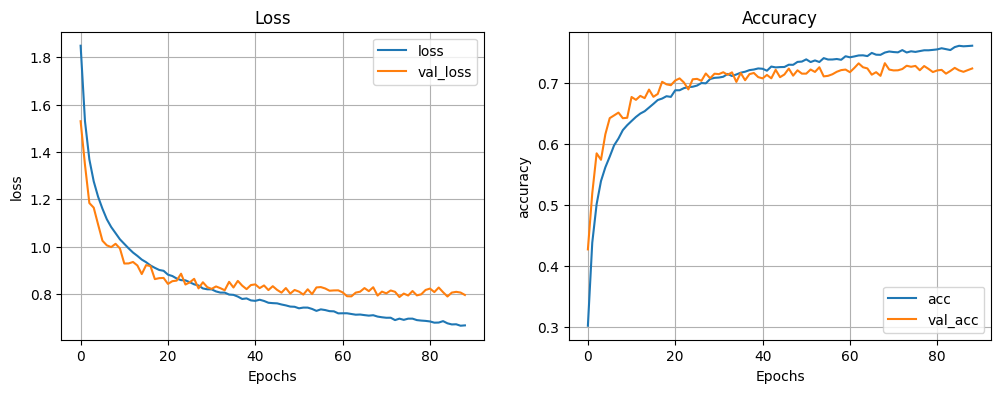

In [43]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel = "Epochs", ylabel = "loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel = "Epochs", ylabel = "accuracy")

plot_metrics(metrics)

## Hyperparameter tuning
- dropout rate
- learning rate
- different network configurations
- wich type of pooling layer
- different optimizers

wee pick dropout



In [44]:
# alltid short patiance
early_stopper = EarlyStopping(monitor = "val_loss", mode="min", patience = 3, restore_best_weights=True)

def evaluate_model (**kwargs):
    model = cnn_model(**kwargs)

    model.fit(
    scaled_X_train, 
    y_train, 
    epochs=10,  #fewer epochs
    callbacks=[early_stopper], 
    validation_split=1/5,
    )

    metrics = pd.DataFrame(model.history.history)
    # plottar sista validation acc 
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [45]:
Dropout_accuracies = {}
for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    Dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate = dropout_rate)

c:\CODING\Github\Python-AI-Sandra-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.3881 - loss: 1.7092 - val_acc: 0.5589 - val_loss: 1.2342
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.5977 - loss: 1.1417 - val_acc: 0.6193 - val_loss: 1.0811
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.6762 - loss: 0.9276 - val_acc: 0.6606 - val_loss: 1.0011
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7245 - loss: 0.7946 - val_acc: 0.6763 - val_loss: 0.9442
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7694 - loss: 0.6615 - val_acc: 0.6820 - val_loss: 0.9652
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.8177 - loss: 0.5264 - val_acc: 0.6846 - val_loss: 1.0087
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.8534 - loss: 0.4277 - val_acc: 0.6744 - val_loss: 1.0640
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.4025 - loss: 1.6673 - val_acc: 0.5910 - val_loss: 1.1644
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━